In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [63]:
df = pd.read_csv('./archive/Netflix TV Shows and Movies.csv')
df.head()

,index,id,title,type,description,release_year,age_certification,runtime,imdb_id,imdb_score,imdb_votes
0,0,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,tt0075314,8.3,795222.0
1,1,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,tt0071853,8.2,530877.0
2,2,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,tt0079470,8.0,392419.0
3,3,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,tt0070047,8.1,391942.0
4,4,ts22164,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,TV-14,30,tt0063929,8.8,72895.0


In [64]:
print(df.info())
print()
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5283 entries, 0 to 5282
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              5283 non-null   int64  
 1   id                 5283 non-null   object 
 2   title              5283 non-null   object 
 3   type               5283 non-null   object 
 4   description        5278 non-null   object 
 5   release_year       5283 non-null   int64  
 6   age_certification  2998 non-null   object 
 7   runtime            5283 non-null   int64  
 8   imdb_id            5283 non-null   object 
 9   imdb_score         5283 non-null   float64
 10  imdb_votes         5267 non-null   float64
dtypes: float64(2), int64(3), object(6)
memory usage: 454.1+ KB
None

(5283, 11)


In [65]:
print(df.isnull().sum())

index                   0
id                      0
title                   0
type                    0
description             5
release_year            0
age_certification    2285
runtime                 0
imdb_id                 0
imdb_score              0
imdb_votes             16
dtype: int64


In [66]:
df['description'].fillna('no-description', inplace=True)
df['age_certification'].fillna('no-certification', inplace=True)
df['imdb_votes'].fillna(0.0, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5283 entries, 0 to 5282
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              5283 non-null   int64  
 1   id                 5283 non-null   object 
 2   title              5283 non-null   object 
 3   type               5283 non-null   object 
 4   description        5283 non-null   object 
 5   release_year       5283 non-null   int64  
 6   age_certification  5283 non-null   object 
 7   runtime            5283 non-null   int64  
 8   imdb_id            5283 non-null   object 
 9   imdb_score         5283 non-null   float64
 10  imdb_votes         5283 non-null   float64
dtypes: float64(2), int64(3), object(6)
memory usage: 454.1+ KB


In [67]:
# df.set_index('index', inplace=True)
# print(df.head(5))
print(df.tail(3))

      index         id                               title   type  \
5280   5280  tm1045018                               Clash  MOVIE   
5281   5281  tm1098060                      Shadow Parties  MOVIE   
5282   5282   ts271048  Mighty Little Bheem: Kite Festival   SHOW   

                                            description  release_year  \
5280  A man from Nigeria returns to his family in Ca...          2021   
5281  A family faces destruction in a long-running c...          2021   
5282  With winter behind them, Bheem and his townspe...          2021   

     age_certification  runtime     imdb_id  imdb_score  imdb_votes  
5280  no-certification       88  tt14620732         6.5        32.0  
5281  no-certification      116  tt10168094         6.2         9.0  
5282  no-certification        0  tt13711094         8.8        16.0  


In [68]:
media_runtime = np.mean(df['runtime'])
mediana_runtime = np.median(df['runtime'])
desviacion_estandar_runtime = np.std(df['runtime'])

media_imdb_score = np.mean(df['imdb_score'])
mediana_imdb_score = np.median(df['imdb_score'])
desviacion_estandar_imdb_score = np.std(df['imdb_score'])

In [69]:
print(f'la de media de runtime es {media_runtime} y su mediana {media_runtime} con su desviacion estandar {desviacion_estandar_runtime}')
print()
print(f'la media de imdb_score {media_imdb_score} y su mediana {mediana_imdb_score} con su desviacion estandar {desviacion_estandar_imdb_score}')

la de media de runtime es 79.19988642816581 y su mediana 79.19988642816581 con su desviacion estandar 38.91229070077051

la media de imdb_score 6.5334469051675175 y su mediana 6.6 con su desviacion estandar 1.160821728492827


In [75]:
min_year = df['release_year'].min()
max_year = df['release_year'].max()

print("Año mínimo: ", min_year)
print("Año máximo: ", max_year)

Año mínimo:  1953
Año máximo:  2022


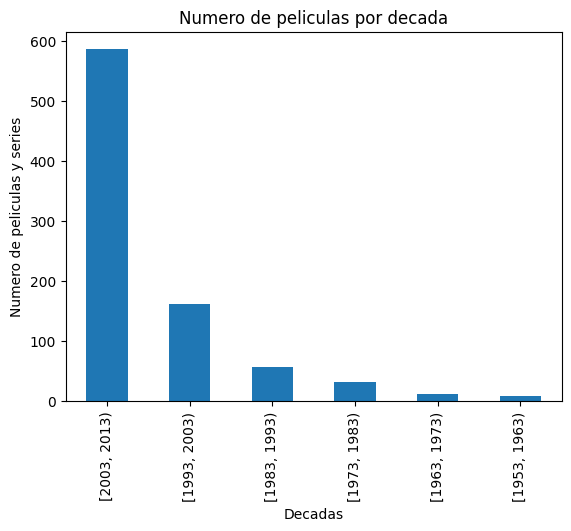

In [83]:
counts = df['decade'].value_counts()
counts.plot(kind='bar')
plt.xticks(rotation=90)
plt.xlabel('Decadas')
plt.ylabel('Numero de peliculas y series')
plt.title('Numero de peliculas por decada')
plt.show()


In [86]:
clasificacion = df['type'].value_counts()
clasificacion

type
MOVIE    3407
SHOW     1876
Name: count, dtype: int64

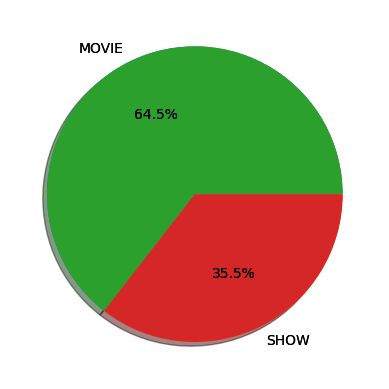

In [89]:
plt.pie(counts, labels = counts.index, autopct='%1.1f%%')
plt.pie(counts, labels = counts.index, autopct='%1.1f%%', shadow=True)
plt.show()
